<a href="https://colab.research.google.com/github/Innov8iveGuru/Python/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's install seaborn for plotting

In [1]:
!pip install seaborn


Let's load up MNIST data set.


In [2]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Preprocess the data: Step 1: Normalize the images

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

Step 2: Reshape the image and add an extra dimension for greyscale channel


In [4]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


Let's now build a Neural network model.

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Now let's compile the model:

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Let's now train our model:

In [7]:
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 46s 24ms/step - accuracy: 0.9180 - loss: 0.2854 - val_accuracy: 0.9787 - val_loss: 0.0632
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 23ms/step - accuracy: 0.9835 - loss: 0.0537 - val_accuracy: 0.9841 - val_loss: 0.0493
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 23ms/step - accuracy: 0.9909 - loss: 0.0301 - val_accuracy: 0.9857 - val_loss: 0.0424
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 23ms/step - accuracy: 0.9934 - loss: 0.0197 - val_accuracy: 0.9863 - val_loss: 0.0444
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 95s 30ms/step - accuracy: 0.9959 - loss: 0.0126 - val_accuracy: 0.9847 - val_loss: 0.0536


Now let's test our model:

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9798 - loss: 0.0699
Test accuracy: 0.9847000241279602


Now let's visualize the results using a Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


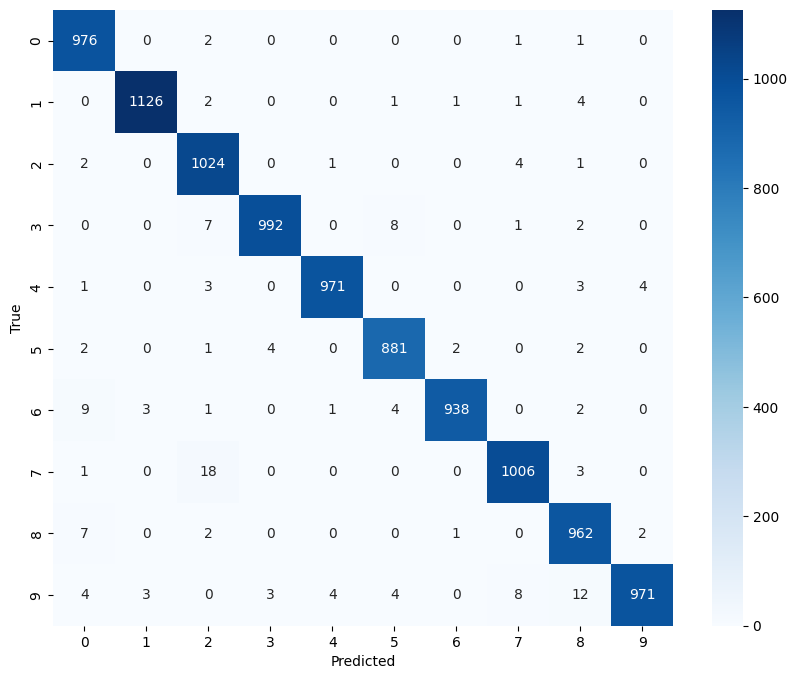

In [9]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)
cm = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
